<a href="https://colab.research.google.com/github/christophersingh/Mental-Health-Classification-Research-/blob/main/Statistical_Significance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read in the data
ny = pd.read_csv('./new_york.csv')
ny

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,date,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,counts,sentiment__negative,sentiment__positive
0,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,171.46,13.55,0.23,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
1,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,1554.45,153.69,12.88,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
2,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2529.03,630.34,113.37,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
3,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2552.64,1192.50,364.17,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
4,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2976.74,1830.07,909.18,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,20207.72,1160.60,67.68,2021-02-01,224684.00000,13326.000000,794.000000,419169.0,501.0,49.0
35780,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,15941.19,2540.10,476.51,2021-02-01,161559.00000,25652.000000,4800.000000,419169.0,501.0,49.0
35781,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7067.11,2418.35,756.82,2021-02-01,50798.00000,17383.000000,5440.000000,419169.0,501.0,49.0
35782,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7477.43,3995.12,1989.81,2021-02-01,41994.00000,22437.000000,11175.000000,419169.0,501.0,49.0


In [3]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']
del data_to_use['counts']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [4]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()

indicator                 0
phase                     0
time_period               0
time_period_start_date    0
time_period_end_date      0
value                     0
lowci                     0
highci                    0
age                       0
CASE_RATE                 0
HOSPITALIZED_RATE         0
DEATH_RATE                0
date                      0
CASE_COUNT                0
HOSPITALIZED_COUNT        0
DEATH_COUNT               0
sentiment__negative       0
sentiment__positive       0
dtype: int64

In [5]:
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [6]:
ny

,indicator,phase,time_period,time_period_start_date,time_period_end_date,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,date,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,sentiment__negative,sentiment__positive
0,1,1,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29,171.46,13.55,0.23,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
1,1,1,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29,1554.45,153.69,12.88,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
2,1,1,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29,2529.03,630.34,113.37,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
3,1,1,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29,2552.64,1192.50,364.17,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
4,1,1,1.0,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,29,2976.74,1830.07,909.18,2020-04-23,90629.21686,19942.175032,6754.809134,500.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,2,5,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80,20207.72,1160.60,67.68,2021-02-01,224684.00000,13326.000000,794.000000,501.0,49.0
35780,2,5,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80,15941.19,2540.10,476.51,2021-02-01,161559.00000,25652.000000,4800.000000,501.0,49.0
35781,2,5,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80,7067.11,2418.35,756.82,2021-02-01,50798.00000,17383.000000,5440.000000,501.0,49.0
35782,2,5,23.0,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,80,7477.43,3995.12,1989.81,2021-02-01,41994.00000,22437.000000,11175.000000,501.0,49.0


In [7]:
ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

In [8]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','sentiment__negative','sentiment__positive','indicator']]
ny

,phase,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,sentiment__negative,sentiment__positive,indicator
0,1.0,1.0,28.7,24.6,33.1,29.0,171.46,13.55,0.23,500.0,50.0,1.0
1,1.0,1.0,28.7,24.6,33.1,29.0,1554.45,153.69,12.88,500.0,50.0,1.0
2,1.0,1.0,28.7,24.6,33.1,29.0,2529.03,630.34,113.37,500.0,50.0,1.0
3,1.0,1.0,28.7,24.6,33.1,29.0,2552.64,1192.50,364.17,500.0,50.0,1.0
4,1.0,1.0,28.7,24.6,33.1,29.0,2976.74,1830.07,909.18,500.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,5.0,23.0,35.8,32.0,39.7,80.0,20207.72,1160.60,67.68,501.0,49.0,2.0
35780,5.0,23.0,35.8,32.0,39.7,80.0,15941.19,2540.10,476.51,501.0,49.0,2.0
35781,5.0,23.0,35.8,32.0,39.7,80.0,7067.11,2418.35,756.82,501.0,49.0,2.0
35782,5.0,23.0,35.8,32.0,39.7,80.0,7477.43,3995.12,1989.81,501.0,49.0,2.0


In [9]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = [	[10, 20, 30],
			[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(ny)
print('dof=%d' % dof)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.9f, critical=%.9f, stat=%.9f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.9f, p=%.9f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=393613
probability=0.950000000, critical=395073.544980270, stat=47175933.879299007
Dependent (reject H0)
significance=0.050000000, p=0.000000000
Dependent (reject H0)


Second Chi-Squared Tutorial

In [10]:
chi, pval, dof, exp = chi2_contingency(ny)
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. They are independent.""" % (significance))

p-value is:  0.0
chi=47175933.879299, critical value=395073.544980

At 0.05 level of significance, we reject the null hypotheses and accept H1. They are not independent.


Feature Selection Pearson Correlation

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [12]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   phase                35784 non-null  float64
 1   time_period          35784 non-null  float64
 2   value                35784 non-null  float64
 3   lowci                35784 non-null  float64
 4   highci               35784 non-null  float64
 5   age                  35784 non-null  float64
 6   CASE_RATE            35784 non-null  float64
 7   HOSPITALIZED_RATE    35784 non-null  float64
 8   DEATH_RATE           35784 non-null  float64
 9   sentiment__negative  35784 non-null  float64
 10  sentiment__positive  35784 non-null  float64
 11  indicator            35784 non-null  float64
dtypes: float64(12)
memory usage: 3.3 MB


In [13]:
corr = ny.corr()
corr

,phase,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,sentiment__negative,sentiment__positive,indicator
phase,1.000000e+00,8.897693e-01,9.538889e-02,1.144787e-01,7.683914e-02,-6.008076e-16,6.279332e-01,2.435348e-01,1.466525e-01,1.990241e-01,-1.990241e-01,-6.160757e-20
time_period,8.897693e-01,1.000000e+00,6.654971e-02,1.001065e-01,3.489649e-02,-6.911640e-17,5.482817e-01,2.298517e-01,1.506810e-01,1.488158e-01,-1.488158e-01,0.000000e+00
value,9.538889e-02,6.654971e-02,1.000000e+00,9.955017e-01,9.958303e-01,-9.187662e-18,7.650176e-02,2.396450e-02,1.312706e-02,-2.309282e-02,2.309282e-02,3.405544e-01
lowci,1.144787e-01,1.001065e-01,9.955017e-01,1.000000e+00,9.827796e-01,8.690290e-17,8.004960e-02,2.732074e-02,1.659406e-02,-2.274351e-02,2.274351e-02,3.410254e-01
highci,7.683914e-02,3.489649e-02,9.958303e-01,9.827796e-01,1.000000e+00,-7.414108e-17,7.339923e-02,2.093948e-02,9.937842e-03,-2.279601e-02,2.279601e-02,3.366559e-01
age,-6.008076e-16,-6.911640e-17,-9.187662e-18,8.690290e-17,-7.414108e-17,1.000000e+00,9.925431e-18,-1.155091e-18,7.319736e-19,-1.492134e-17,-3.658805e-17,-2.799565e-19
CASE_RATE,6.279332e-01,5.482817e-01,7.650176e-02,8.004960e-02,7.339923e-02,9.925431e-18,1.000000e+00,4.204207e-01,1.704277e-01,1.526932e-01,-1.526932e-01,2.638129e-19
HOSPITALIZED_RATE,2.435348e-01,2.298517e-01,2.396450e-02,2.732074e-02,2.093948e-02,-1.155091e-18,4.204207e-01,1.000000e+00,9.041907e-01,4.950255e-02,-4.950255e-02,-2.181751e-19
DEATH_RATE,1.466525e-01,1.506810e-01,1.312706e-02,1.659406e-02,9.937842e-03,7.319736e-19,1.704277e-01,9.041907e-01,1.000000e+00,1.950932e-02,-1.950932e-02,6.413899e-19
sentiment__negative,1.990241e-01,1.488158e-01,-2.309282e-02,-2.274351e-02,-2.279601e-02,-1.492134e-17,1.526932e-01,4.950255e-02,1.950932e-02,1.000000e+00,-1.000000e+00,0.000000e+00


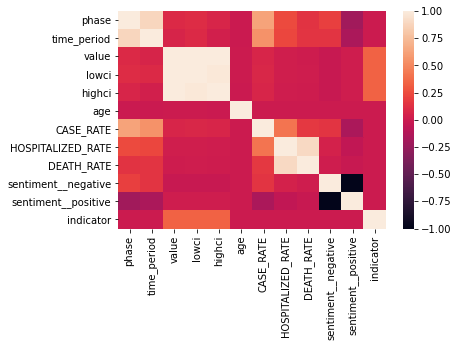

In [14]:
sns.heatmap(corr)

Remove features with a correlation value less than 0.9

In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
selected_columns = ny.columns[columns]
data = ny[selected_columns]

In [16]:
data

,phase,time_period,value,age,CASE_RATE,HOSPITALIZED_RATE,sentiment__negative,sentiment__positive,indicator
0,1.0,1.0,28.7,29.0,171.46,13.55,500.0,50.0,1.0
1,1.0,1.0,28.7,29.0,1554.45,153.69,500.0,50.0,1.0
2,1.0,1.0,28.7,29.0,2529.03,630.34,500.0,50.0,1.0
3,1.0,1.0,28.7,29.0,2552.64,1192.50,500.0,50.0,1.0
4,1.0,1.0,28.7,29.0,2976.74,1830.07,500.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...
35779,5.0,23.0,35.8,80.0,20207.72,1160.60,501.0,49.0,2.0
35780,5.0,23.0,35.8,80.0,15941.19,2540.10,501.0,49.0,2.0
35781,5.0,23.0,35.8,80.0,7067.11,2418.35,501.0,49.0,2.0
35782,5.0,23.0,35.8,80.0,7477.43,3995.12,501.0,49.0,2.0


In [17]:
import statsmodels.formula.api as sm
import statsmodels.api as sm

selected_columns = selected_columns[1:].values

In [18]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
  
significance_level = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, significance_level, selected_columns)

In [19]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data

,time_period,value,CASE_RATE,HOSPITALIZED_RATE,sentiment__negative,sentiment__positive,indicator
0,1.0,28.7,171.46,13.55,500.0,50.0,1.0
1,1.0,28.7,1554.45,153.69,500.0,50.0,1.0
2,1.0,28.7,2529.03,630.34,500.0,50.0,1.0
3,1.0,28.7,2552.64,1192.50,500.0,50.0,1.0
4,1.0,28.7,2976.74,1830.07,500.0,50.0,1.0
...,...,...,...,...,...,...,...
35779,23.0,35.8,20207.72,1160.60,501.0,49.0,2.0
35780,23.0,35.8,15941.19,2540.10,501.0,49.0,2.0
35781,23.0,35.8,7067.11,2418.35,501.0,49.0,2.0
35782,23.0,35.8,7477.43,3995.12,501.0,49.0,2.0


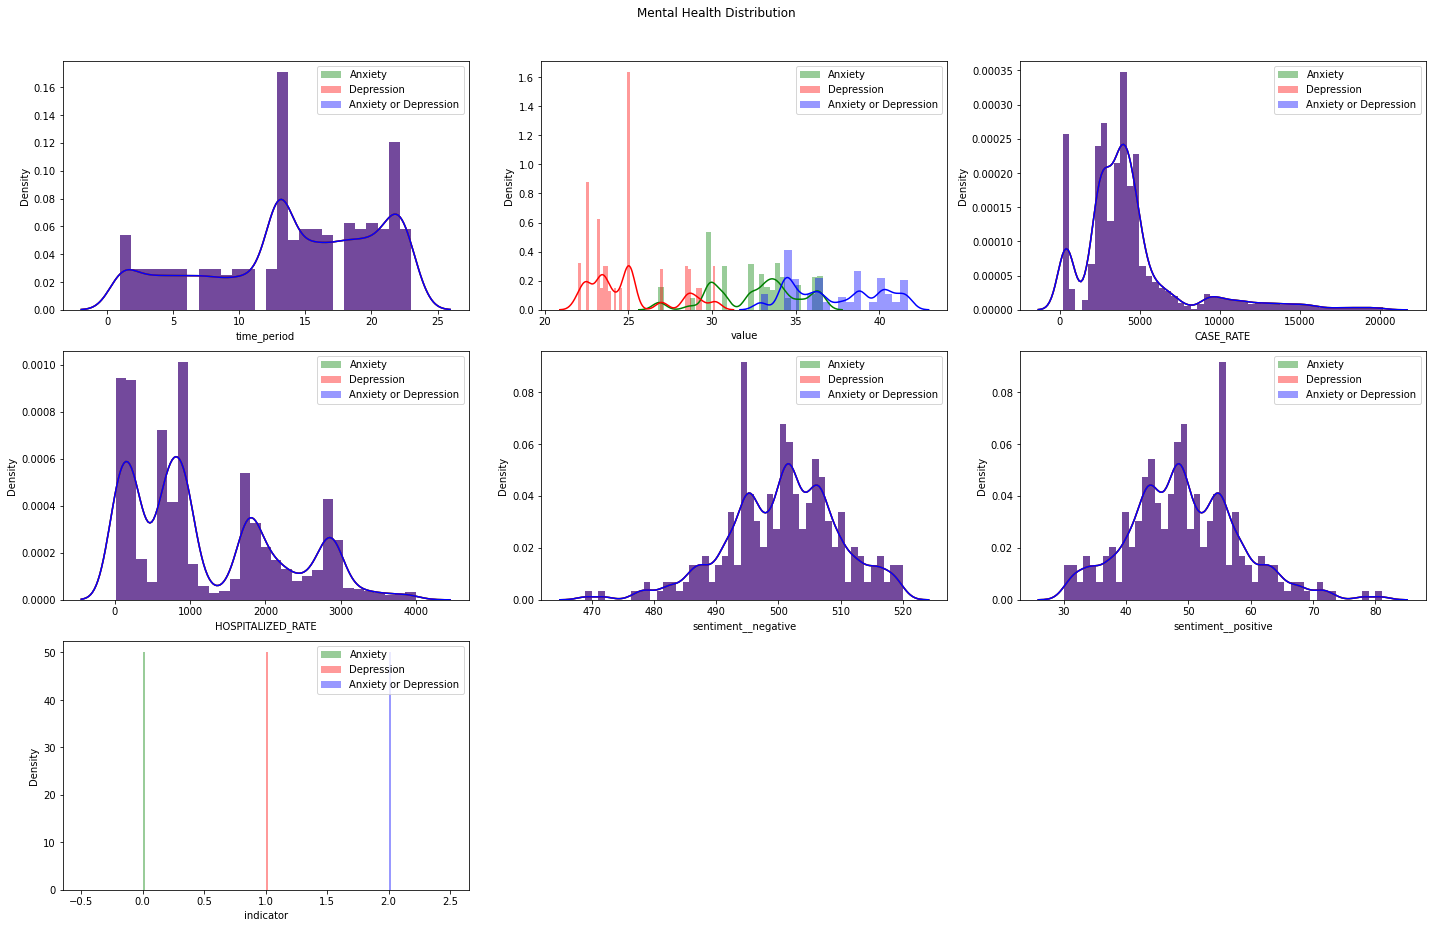

In [20]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 3, j+1)
    j += 1
    sns.distplot(data[i][ny['indicator']==0], color='g', label = 'Anxiety')
    sns.distplot(data[i][ny['indicator']==1], color='r', label = 'Depression')
    sns.distplot(data[i][ny['indicator']==2], color='b', label = 'Anxiety or Depression')
    plt.legend(loc='best')
fig.suptitle('Mental Health Distribution')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [21]:
data

,time_period,value,CASE_RATE,HOSPITALIZED_RATE,sentiment__negative,sentiment__positive,indicator
0,1.0,28.7,171.46,13.55,500.0,50.0,1.0
1,1.0,28.7,1554.45,153.69,500.0,50.0,1.0
2,1.0,28.7,2529.03,630.34,500.0,50.0,1.0
3,1.0,28.7,2552.64,1192.50,500.0,50.0,1.0
4,1.0,28.7,2976.74,1830.07,500.0,50.0,1.0
...,...,...,...,...,...,...,...
35779,23.0,35.8,20207.72,1160.60,501.0,49.0,2.0
35780,23.0,35.8,15941.19,2540.10,501.0,49.0,2.0
35781,23.0,35.8,7067.11,2418.35,501.0,49.0,2.0
35782,23.0,35.8,7477.43,3995.12,501.0,49.0,2.0


In [22]:
data.to_csv('./statistically_significant_data.csv', index=False)

Chi-Squared Part 2

In [23]:
ny = pd.read_csv('./new_york.csv')
ny

,indicator,group,state,subgroup,phase,time_period,time_period_label,time_period_start_date,time_period_end_date,value,lowci,highci,confidence_interval,quartile_range,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,date,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,counts,sentiment__negative,sentiment__positive
0,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,171.46,13.55,0.23,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
1,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,1554.45,153.69,12.88,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
2,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2529.03,630.34,113.37,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
3,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2552.64,1192.50,364.17,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
4,Symptoms of Depressive Disorder,By State,New York,New York,1,1.0,Apr 23 - May 5,2020-04-23T00:00:00.000,2020-05-05T00:00:00.000,28.7,24.6,33.1,24.6 - 33.1,24.1 - 28.7,18 - 29 years,2976.74,1830.07,909.18,2020-04-23,90629.21686,19942.175032,6754.809134,295066.0,500.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,20207.72,1160.60,67.68,2021-02-01,224684.00000,13326.000000,794.000000,419169.0,501.0,49.0
35780,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,15941.19,2540.10,476.51,2021-02-01,161559.00000,25652.000000,4800.000000,419169.0,501.0,49.0
35781,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7067.11,2418.35,756.82,2021-02-01,50798.00000,17383.000000,5440.000000,419169.0,501.0,49.0
35782,Symptoms of Anxiety Disorder or Depressive Dis...,By State,New York,New York,3 (Jan 6 � Feb 1),23.0,Jan 20 - Feb 1,2021-01-20T00:00:00.000,2021-02-01T00:00:00.000,35.8,32.0,39.7,32.0 - 39.7,28.8-37.6,80 years and above,7477.43,3995.12,1989.81,2021-02-01,41994.00000,22437.000000,11175.000000,419169.0,501.0,49.0


In [24]:
ny["indicator"].replace({"Symptoms of Anxiety Disorder": "0", "Symptoms of Depressive Disorder": "1", "Symptoms of Anxiety Disorder or Depressive Disorder": "2"}, inplace=True)
ny["age"].replace({"18 - 29 years": "29", "30 - 39 years": "39", "40 - 49 years": "49", "50 - 59 years":"59","60 - 69 years":"69","70 - 79 years":"79","80 years and above":"80"}, inplace=True)

data_to_use = ny
del data_to_use['group']
del data_to_use['state']
del data_to_use['subgroup']
del data_to_use['time_period_label']
del data_to_use['confidence_interval']
del data_to_use['quartile_range']
del data_to_use['counts']

ny = data_to_use
ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35784 entries, 0 to 35783
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   indicator               35784 non-null  object 
 1   phase                   35784 non-null  object 
 2   time_period             35784 non-null  float64
 3   time_period_start_date  35784 non-null  object 
 4   time_period_end_date    35784 non-null  object 
 5   value                   35784 non-null  float64
 6   lowci                   35784 non-null  float64
 7   highci                  35784 non-null  float64
 8   age                     35784 non-null  object 
 9   CASE_RATE               35784 non-null  float64
 10  HOSPITALIZED_RATE       35784 non-null  float64
 11  DEATH_RATE              33957 non-null  float64
 12  date                    35784 non-null  object 
 13  CASE_COUNT              35784 non-null  float64
 14  HOSPITALIZED_COUNT      35784 non-null

In [25]:
ny['DEATH_RATE'].fillna((ny['DEATH_RATE'].mean()), inplace=True)
ny.isna().sum()

indicator                 0
phase                     0
time_period               0
time_period_start_date    0
time_period_end_date      0
value                     0
lowci                     0
highci                    0
age                       0
CASE_RATE                 0
HOSPITALIZED_RATE         0
DEATH_RATE                0
date                      0
CASE_COUNT                0
HOSPITALIZED_COUNT        0
DEATH_COUNT               0
sentiment__negative       0
sentiment__positive       0
dtype: int64

In [26]:
#Add this cell after API change
ny.loc[ny['phase'] == ('Oct 28 � Dec 21'), 'phase'] = 3
ny.loc[ny['phase'] == ('3 (Oct 28 � Dec 21)'), 'phase'] = 4
ny.loc[ny['phase'] == ('3 (Jan 6 � Feb 1)'), 'phase'] = 5
ny.rename(columns = {'counts':'twitter_count'}, inplace = True)

In [27]:
ny["age"] = ny['age'].astype(float)
ny["phase"] = ny['phase'].astype(float)
ny["indicator"] = ny['indicator'].astype(float)
ny["time_period"] = ny['time_period'].astype(float)

In [28]:
ny = ny[['phase', 'time_period', 'value', 'lowci', 'highci', 'age', 'CASE_RATE', 'HOSPITALIZED_RATE','DEATH_RATE','sentiment__negative','sentiment__positive','indicator']]
ny

,phase,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,sentiment__negative,sentiment__positive,indicator
0,1.0,1.0,28.7,24.6,33.1,29.0,171.46,13.55,0.23,500.0,50.0,1.0
1,1.0,1.0,28.7,24.6,33.1,29.0,1554.45,153.69,12.88,500.0,50.0,1.0
2,1.0,1.0,28.7,24.6,33.1,29.0,2529.03,630.34,113.37,500.0,50.0,1.0
3,1.0,1.0,28.7,24.6,33.1,29.0,2552.64,1192.50,364.17,500.0,50.0,1.0
4,1.0,1.0,28.7,24.6,33.1,29.0,2976.74,1830.07,909.18,500.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,5.0,23.0,35.8,32.0,39.7,80.0,20207.72,1160.60,67.68,501.0,49.0,2.0
35780,5.0,23.0,35.8,32.0,39.7,80.0,15941.19,2540.10,476.51,501.0,49.0,2.0
35781,5.0,23.0,35.8,32.0,39.7,80.0,7067.11,2418.35,756.82,501.0,49.0,2.0
35782,5.0,23.0,35.8,32.0,39.7,80.0,7477.43,3995.12,1989.81,501.0,49.0,2.0


Shapiro-Wilks Test

In [29]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
seed(1)
stat, p = shapiro(ny.values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p < alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.390, p=0.000
Sample looks Gaussian


One-Way ANOVA Testing

In [30]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import os
import random

import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [31]:
ny

,phase,time_period,value,lowci,highci,age,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,sentiment__negative,sentiment__positive,indicator
0,1.0,1.0,28.7,24.6,33.1,29.0,171.46,13.55,0.23,500.0,50.0,1.0
1,1.0,1.0,28.7,24.6,33.1,29.0,1554.45,153.69,12.88,500.0,50.0,1.0
2,1.0,1.0,28.7,24.6,33.1,29.0,2529.03,630.34,113.37,500.0,50.0,1.0
3,1.0,1.0,28.7,24.6,33.1,29.0,2552.64,1192.50,364.17,500.0,50.0,1.0
4,1.0,1.0,28.7,24.6,33.1,29.0,2976.74,1830.07,909.18,500.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35779,5.0,23.0,35.8,32.0,39.7,80.0,20207.72,1160.60,67.68,501.0,49.0,2.0
35780,5.0,23.0,35.8,32.0,39.7,80.0,15941.19,2540.10,476.51,501.0,49.0,2.0
35781,5.0,23.0,35.8,32.0,39.7,80.0,7067.11,2418.35,756.82,501.0,49.0,2.0
35782,5.0,23.0,35.8,32.0,39.7,80.0,7477.43,3995.12,1989.81,501.0,49.0,2.0


In [32]:
F, p = stats.f_oneway(ny['phase'], ny['time_period'], ny['value'], ny['lowci'], ny['highci'], ny['age'], ny['CASE_RATE'], ny['HOSPITALIZED_RATE'], ny['DEATH_RATE'], ny['sentiment__negative'], ny['sentiment__positive'], ny['indicator'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))
if (p < 0.05):
  print("Reject Null Hypothesis and Accept Alternate Hypothesis")
else:
  print("Accept Null Hypothesis")

F-Statistic=53726.238, p=0.000
Reject Null Hypothesis and Accept Alternate Hypothesis
